# This notebook aims at looking at the strongly variable diss. Th concentrations measured for 2009 stations in the intermediate/deep Canada Basin

### Is this Th variability related to T and/or S anomalies?

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import Data

data,sta,date,lon,lat,P,d,t,s,theta,Tpot,Tr,fluo,oxy_uM,oxy_mL,rho,isop,si,ti,NO3_1,NO3_2,PO3_1,PO3_2,SiO4_1,SiO4_2,nut = Data.AllData_variables();
PaThData,PaTh_sta,PaTh_lon,PaTh_lat,PaTh_t,PaTh_s,PaTh_theta,PaTh_rho,PaTh_d = Data.PaTh_variables();
listAllSta,listPaThSta,PaThDataSorted,PaThSort_sta,PaThSort_d,Pa,Th,PaTh,PaErr,ThErr,PaThErr = Data.PaTh_varSorted();

/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Data.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data.Tpot[thetaOnly] = data.theta[thetaOnly]


354.0 13.0


/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/DerivVar.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  isop = np.zeros((ydim,xdim))
/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


354.0 13.0
354.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.


354.0 13.0


In [3]:
#data.head()


In [4]:
#data.temp[(data.theta.notnull()) & (data.temp.isnull())]
#data.theta[(data.theta.notnull()) & (data.temp.isnull())]
#data.Tpot[(data.theta.notnull()) & (data.temp.isnull())]

In [5]:
#s.values,t.values,P.values
#s[theta.isnull()]
#data[(data.theta.notnull()) & (data.temp.isnull())]
#data[(data.Tpot.isnull())]

In [6]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.figure as mfig
import matplotlib.image as mpimg
#import seawater.gibbs as gsw

import netCDF4 as nc
import numpy as np
import scipy.io as sio
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import pandas as pd
import pickle as pl
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from salishsea_tools import  psu_tools

from matplotlib.pyplot import *
#from seabird.cnv import fCNV

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [7]:
#dir()
#locals()
#globals()

In [8]:
#im = plt.imread('/ocean/mgrenier/geotraces/research/Geotraces2015data/PaThStationsGreyPal_Map.png') #I want to add a pdf if possible!
#plt.imshow(im)

In [9]:
#si,ti,isop
#s.min(),s.max()
#clabel?
#listPaThSta

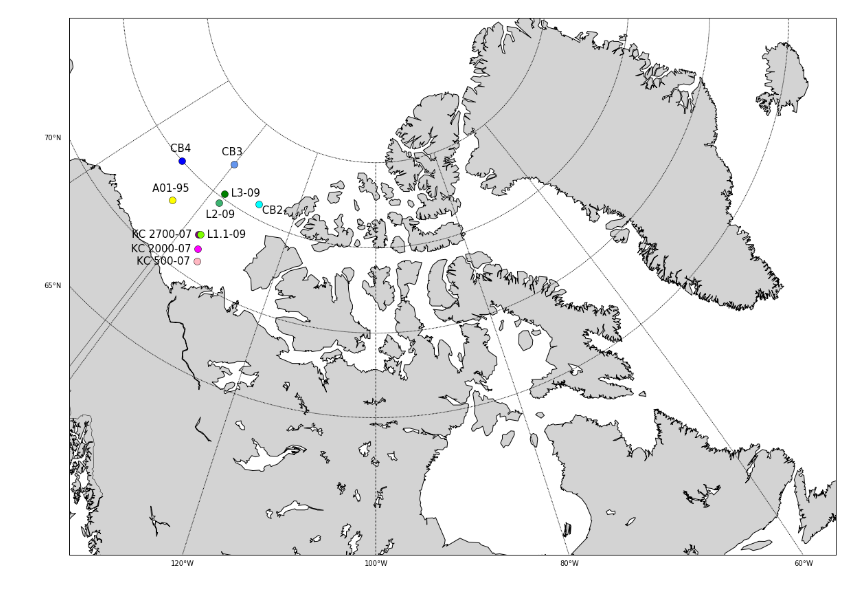

In [10]:
img1=mpimg.imread('/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/PaThStations-CBcompar_Map.png')
fig = plt.figure(figsize=(20, 10)) 
plt.imshow(img1);
plt.axis('off');

In [11]:
#data[P%5==0].head() ## Filter data for pressure modulo 5 equal 0, so for P multiple of 5
#PaThData[(PaTh_lon < -120) & (PaThData['Cast name'].notnull())]
#PaThData['Cast name'][PaTh_sta == 'KC 500-2007']
#PaThData[(PaTh_sta == 'KC 500-2007') & (PaThData['Cast name'].isnull())]
#PaThData[PaThData['Cast name'].isnull()].head()
#t=PaThData[round(PaTh_d)%5!=0]
#t
#station

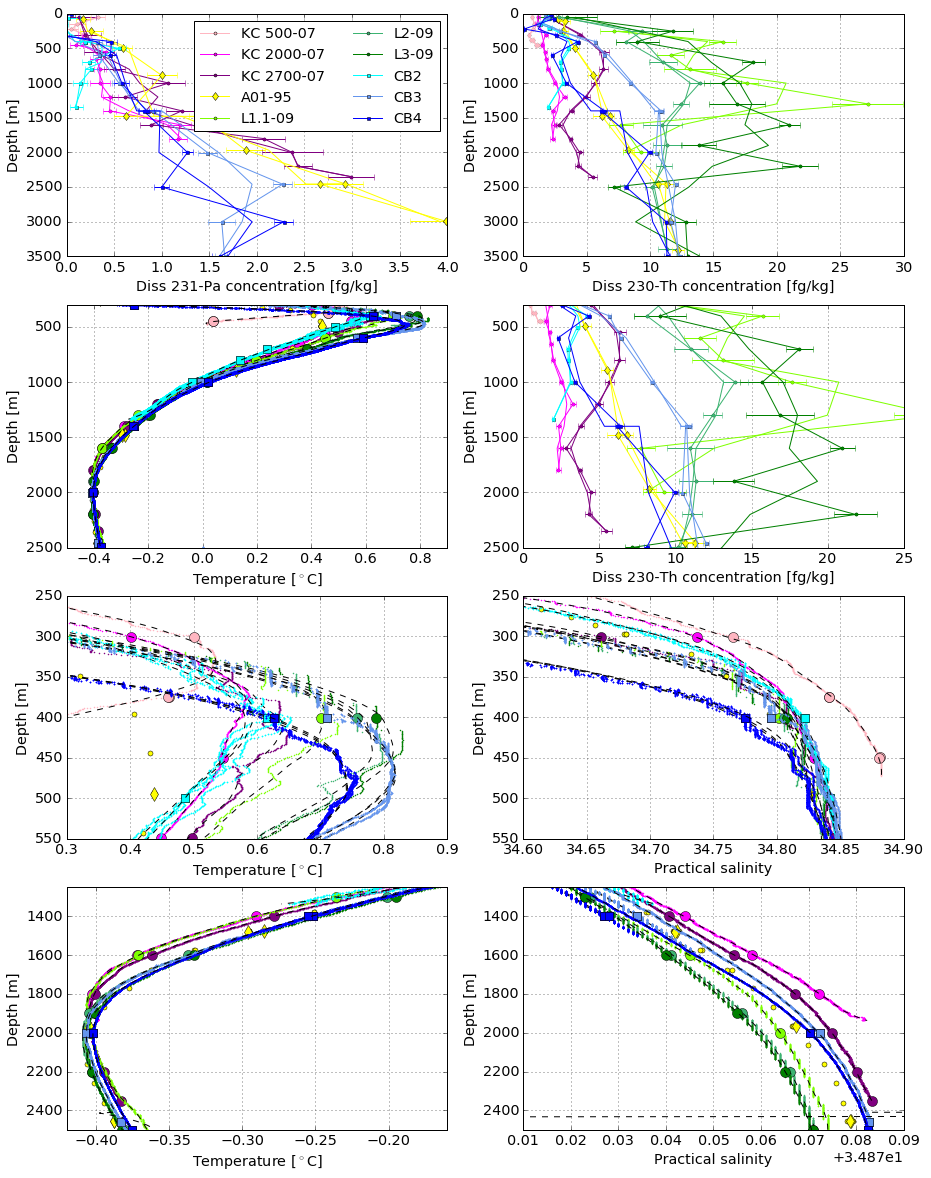

In [12]:
import matplotlib.pyplot as plt

fig,((ax1, ax2), (ax3, ax4), (ax5, ax6),(ax7,ax8))=plt.subplots(4,2,facecolor='w',figsize=(15,20))



for station,cast,name,Mt,St,Mtd,M,S,C in zip(('KC 500-2007', 'KC 2000-2007', 'KC 2700-2007', 'A01-95',
                                              'L1.1-2009', 'L2-2009',
                          'L3-2009','CB2','CB2','CB3','CB3','CB3','CB4','CB4','CB4'),
                          (data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-1',
                           data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-2',
                           data['Cast name'] == 'TM1',data['Cast name'] == 'RADS',
                           data['Cast name'] == 'GEOCHEM-2',data['Cast name'] == 'TM1'),
                        ('KC 500-07', 'KC 2000-07', 'KC 2700-07', 'A01-95', 'L1.1-09', 'L2-09',
                          'L3-09','CB2','CB2','CB3','CB3','CB3','CB4','CB4','CB4'),
                        ('.','.','.','o','.','.','.','.','.','.','.','.','.','.','.'),
                        (2,2,2,5,2,2,2,2,2,2,2,2,2,2,2),
                        ('o','o','o','d','o','o','o','s','s','s','s','s','s','s','s'),
                        ('o-','o-','o-','d-','o-','o-','o-','s-','s-','s-','s-','s-','s-','s-','s-'),
                        (10,10,10,10,10,10,10,8,8,8,8,8,8,8,8),
                        ('lightpink','magenta','purple','yellow','chartreuse','mediumseagreen',
                        'green','cyan','cyan','cornflowerblue','cornflowerblue','cornflowerblue','blue','blue','blue')):
    
    for ax,xfield,yfield,xfilter,yfilter,xdata,ydata,xlabels,ylabels,xranges,yranges in zip((ax3,ax5,ax6,ax7,ax8),
                                    (t,t,s,t,s),(d,d,d,d,d),
                                    (t[(sta == station)  & (cast)],t[(sta == station)  & (cast)],s[(sta == station)  & (cast)],t[(sta == station)  & (cast)],s[(sta == station)  & (cast)]),
                                    (d[(sta == station)  & (cast)],d[(sta == station)  & (cast)],d[(sta == station)  & (cast)],d[(sta == station)  & (cast)],d[(sta == station)  & (cast)]),
                                    (PaTh_t,PaTh_t,PaTh_s,PaTh_t,PaTh_s),(PaTh_d,PaTh_d,PaTh_d,PaTh_d,PaTh_d),
                                    ('Temperature [$^\circ$C]','Temperature [$^\circ$C]',
                                     'Practical salinity','Temperature [$^\circ$C]','Practical salinity'),
                                    ('Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]'),
                                    ([-0.5,0.9],[0.3, 0.9],[34.6, 34.9],[-0.42, -0.16],[34.88, 34.96]),
                                    ([300,2500],[250, 550],[250, 550],[1250, 2500],[1250, 2500])):
        ax.plot(xfield[(sta == station)],yfield[(sta == station)],Mt,markersize=St,color=C,label=station)
        ax.plot(xdata[(sta == station)],ydata[(sta == station)],Mtd,markersize=S,color=C,label=station)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()
        
        idx = np.isfinite(xfilter) & np.isfinite(yfilter)
        x=xfilter[idx]
        y=yfilter[idx]

        if (station != 'A01-95') & (x.size != 0):
            xfilt = savgol_filter(x, 181, 3) # window size 5, polynomial order 3
            ax.plot(xfilt, y,'--',markersize=1, color='k')
        
       
for station,name,St,M,C in zip(('KC 500-2007', 'KC 2000-2007', 'KC 2700-2007', 'A01-95',
                                'L1.1-2009', 'L2-2009','L3-2009','CB2','CB3','CB4'),
                                ('KC 500-07', 'KC 2000-07', 'KC 2700-07', 'A01-95', 'L1.1-09', 'L2-09',
                                'L3-09','CB2','CB3','CB4'),
                                (2,2,2,5,2,2,2,2,2,2),
                                ('o-','o-','o-','d-','o-','o-','o-','s-','s-','s-'),
                                ('lightpink','magenta','purple','yellow','chartreuse','mediumseagreen',
                                'green','cyan','cornflowerblue','blue')):
            
    for ax,xfield,yfield,XERR,xlabels,ylabels,xranges,yranges in zip((ax1,ax2,ax4),(Pa,Th,Th),
                                    (PaThSort_d,PaThSort_d,PaThSort_d),
                                    (PaErr,ThErr,ThErr),
                                    ('Diss 231-Pa concentration [fg/kg]','Diss 230-Th concentration [fg/kg]',
                                     'Diss 230-Th concentration [fg/kg]'),
                                    ('Depth [m]','Depth [m]','Depth [m]'),
                                    ([0,4],[0, 30],[0, 25]),
                                    ([0,3500],[0, 3500],[300, 2500])):
        ax.plot(xfield[PaThSort_sta == station],yfield[PaThSort_sta == station],M,markersize=St+1,color=C,label=name)
        ax.errorbar(xfield[PaThSort_sta == station],yfield[PaThSort_sta == station],
                     xerr=XERR[PaThSort_sta == station].tolist(),color=C,fmt='.',label='_nolegend_')
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()
        
        idx = np.isfinite(xfield[PaThSort_sta == station]) & np.isfinite(yfield[PaThSort_sta == station])
        x=xfield[PaThSort_sta == station][idx]
        y=yfield[PaThSort_sta == station][idx]
        if x.size != 0:
            xfilt = savgol_filter(x, 5, 3) # window size 5, polynomial order 3
            ax.plot(xfilt, y,'-',markersize=1, color=C,label='_nolegend_')
    '''    
    for ax,xfield,yfield,xfilter,yfilter,XERR,xlabels,ylabels,xranges,yranges in zip((ax1,ax2,ax4),
                                    (Pa,Th,Th),
                                    (PaThSort_d,PaThSort_d,PaThSort_d),
                                    (PaThData.Pa,PaThData.Th,PaThData.Th),
                                    (PaTh_d,PaTh_d,PaTh_d),
                                    (PaErr,ThErr,ThErr),
                                    ('Diss 231-Pa concentration [fg/kg]','Diss 230-Th concentration [fg/kg]',
                                     'Diss 230-Th concentration [fg/kg]'),
                                    ('Depth [m]','Depth [m]','Depth [m]'),
                                    ([0,4],[0, 30],[0, 25]),
                                    ([0,3500],[0, 3500],[300, 2500])):
        ax.plot(xfield[PaThSort_sta == station],yfield[PaThSort_sta == station],M,markersize=St+1,color=C,label=name)
        ax.errorbar(xfield[PaThSort_sta == station],yfield[PaThSort_sta == station],
                     xerr=XERR[PaThSort_sta == station].tolist(),color=C,fmt='.',label='_nolegend_')
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()
        
        idx = np.isfinite(xfilter[PaTh_sta == station]) & np.isfinite(yfilter[PaTh_sta == station])
        x=xfilter[PaTh_sta == station][idx]
        y=yfilter[PaTh_sta == station][idx]
        if x.size != 0:
            xfilt = savgol_filter(x, 5, 3) # window size 5, polynomial order 3
            ax.plot(xfilt, y,'-',markersize=1, color=C,label='_nolegend_')
    '''

for ax, in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

handles, labels = ax1.get_legend_handles_labels()

ax1.legend(handles[0:10],labels[0:10],ncol=2,loc='best',numpoints=1,framealpha=1,frameon=True)
#ax3.add_artist(CTD[0,2,4,6,8,10,12,14,16,18])

savefig('Figures/PaThStations_Pa-Th-T-S-vsd_zoomAW-color-v2.png',bbox_inches='tight')

plt.show()


In [13]:
#Xanom

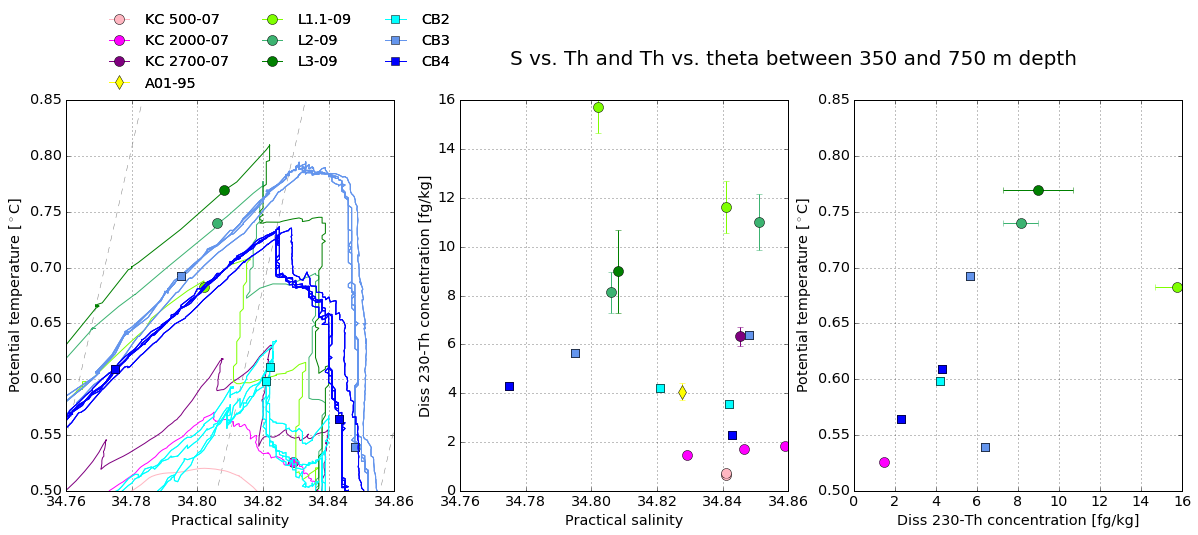

In [14]:
fig,((ax1, ax2,ax3))=plt.subplots(1,3,facecolor='w',figsize=(20,7))

CS=ax1.contour(si,ti,isop,900, linestyles='dashed',linewidths = 0.5, colors='grey')
ax1.clabel(CS, fontsize=12, inline=1, fmt='%0.01f') # Label every second level

for station,cast,name,Mt,St,Mtd,M,S,C in zip(('KC 500-2007', 'KC 2000-2007', 'KC 2700-2007', 'A01-95',
                                              'L1.1-2009', 'L2-2009',
                          'L3-2009','CB2','CB2','CB3','CB3','CB3','CB4','CB4','CB4'),
                          (data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-1',
                           data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-2',
                           data['Cast name'] == 'TM1',data['Cast name'] == 'RADS',
                           data['Cast name'] == 'GEOCHEM-2',data['Cast name'] == 'TM1'),
                        ('KC 500-07', 'KC 2000-07', 'KC 2700-07', 'A01-95', 'L1.1-09', 'L2-09',
                          'L3-09','CB2','CB2','CB3','CB3','CB3','CB4','CB4','CB4'),
                        ('.','.','.','o','.','.','.','.','.','.','.','.','.','.','.'),
                        (2,2,2,5,2,2,2,2,2,2,2,2,2,2,2),
                        ('o','o','o','d','o','o','o','s','s','s','s','s','s','s','s'),
                        ('o-','o-','o-','d-','o-','o-','o-','s-','s-','s-','s-','s-','s-','s-','s-'),
                        (10,10,10,10,10,10,10,8,8,8,8,8,8,8,8),
                        ('lightpink','magenta','purple','yellow','chartreuse','mediumseagreen',
                        'green','cyan','cyan','cornflowerblue','cornflowerblue','cornflowerblue','blue','blue','blue')):
                        #('mediumvioletred','k','deeppink','yellow','lime','seagreen',
                        #'darkseagreen','gold','dodgerblue','blue')):

#    ax1.plot(s[sta == station],data.Tpot[sta == station],Mt,markersize=St,color=C,label=name)
    ax1.plot(s[sta == station],data.Tpot[sta == station],'-',markersize=St,color=C,label=name)
    ax1.plot(PaTh_s[PaTh_sta == station],PaThData.Tpot[PaTh_sta == station],Mtd,markersize=S,color=C,label=name)
#    ax1.set_xlim([34.4,34.9])
    ax1.set_xlim([34.76,34.86])
#    ax1.set_ylim([-0.5,0.9])
    ax1.set_ylim([0.5,0.85])
    ax1.set_xlabel('Practical salinity')
    ax1.set_ylabel('Potential temperature [$^\circ$C]')


    d_range=(PaTh_d > 350) & (PaTh_d < 750)
    
    for ax,xfield,yfield,XERR,YERR,xlabels,ylabels,xranges,yranges in zip((ax2,ax3),(PaTh_s,PaThData.Th),
                                    (PaThData.Th,PaThData.Tpot),
                                    (None,PaThData.ThErr[(PaTh_sta == station) & d_range].tolist()),
                                    (PaThData.ThErr[(PaTh_sta == station) & d_range].tolist(),None),
                                    ('Practical salinity','Diss 230-Th concentration [fg/kg]'),
                                    ('Diss 230-Th concentration [fg/kg]','Potential temperature [$^\circ$C]'),
                                    #([34.4,34.9],[0, 15]),
                                    ([34.76,34.86],[0, 16]),
                                    #([0,15],[-0.5, 0.9])):
                                    ([0,16],[0.5, 0.85])):
                                    #([0,25],[-0.4, 0.85])):
        ax.plot(xfield[(PaTh_sta == station) & d_range],yfield[(PaTh_sta == station) & d_range],Mtd,markersize=S,color=C,label=name)
        ax.errorbar(xfield[(PaTh_sta == station) & d_range],yfield[(PaTh_sta == station) & d_range],xerr=XERR,yerr=YERR,color=C,fmt='.',label='_nolegend_')
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)


h1, l1 = ax1.get_legend_handles_labels()

CTD=ax2.legend((h1[0],h1[2],h1[4],h1[6],h1[8],h1[10],h1[12],h1[14],h1[18],h1[24]),
               (l1[1],l1[3],l1[5],l1[7],l1[9],l1[11],l1[13],l1[15],l1[19],l1[25]),
               numpoints=10,loc=(-1.1,1.01),ncol=3,framealpha=0,frameon=False)
    
for ax, in zip((ax1,ax2,ax3)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

handles, labels = ax1.get_legend_handles_labels()

ax2.legend((h1[1],h1[3],h1[5],h1[7],h1[9],h1[11],h1[13],h1[15],h1[19],h1[25]),
            (l1[1],l1[3],l1[5],l1[7],l1[9],l1[11],l1[13],l1[15],l1[19],l1[25]),
            loc=(-1.1,1.01),ncol=3,numpoints=1,framealpha=0,frameon=True)
ax2.add_artist(CTD)
#ax2.add_artist(CTD[0,2,4,6,8,10,12,14,16,18])

fig.suptitle('S vs. Th and Th vs. theta between 350 and 750 m depth',fontsize=20,position=(0.63,1))
savefig('Figures/PaThStations_thetaS-ThS_zoomAW-color-v2.png',bbox_inches='tight')

plt.show()


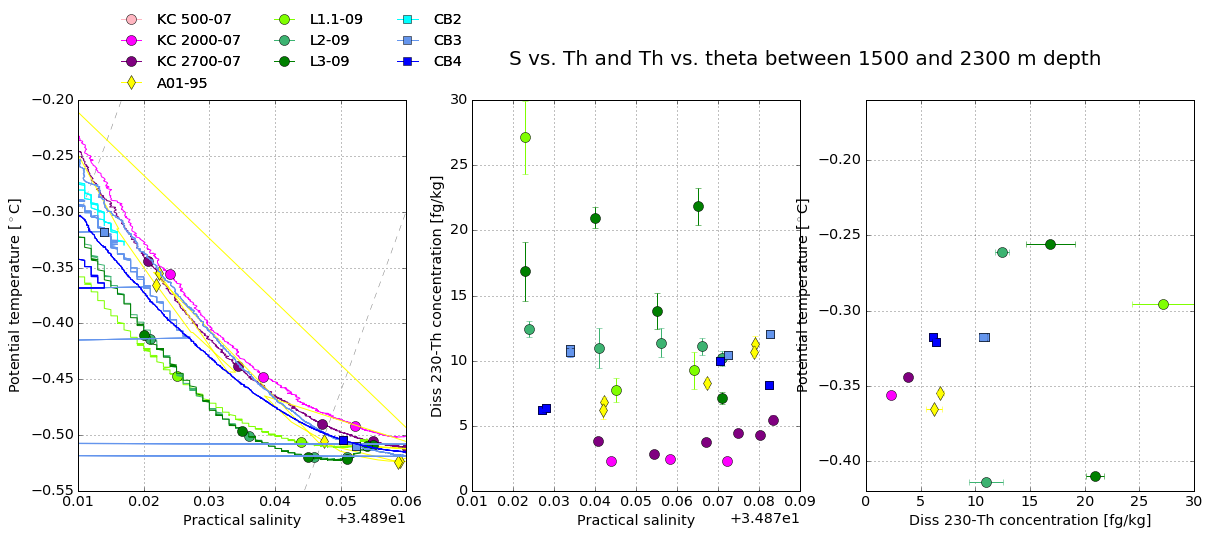

In [15]:
fig,((ax1, ax2,ax3))=plt.subplots(1,3,facecolor='w',figsize=(20,7))

CS=ax1.contour(si,ti,isop,900, linestyles='dashed',linewidths = 0.5, colors='grey')
ax1.clabel(CS, fontsize=12, inline=1, fmt='%0.01f') # Label every second level

for station,cast,name,Mt,St,Mtd,M,S,C in zip(('KC 500-2007', 'KC 2000-2007', 'KC 2700-2007', 'A01-95',
                                              'L1.1-2009', 'L2-2009',
                          'L3-2009','CB2','CB2','CB3','CB3','CB3','CB4','CB4','CB4'),
                          (data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-1',
                           data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-2',
                           data['Cast name'] == 'TM1',data['Cast name'] == 'RADS',
                           data['Cast name'] == 'GEOCHEM-2',data['Cast name'] == 'TM1'),
                        ('KC 500-07', 'KC 2000-07', 'KC 2700-07', 'A01-95', 'L1.1-09', 'L2-09',
                          'L3-09','CB2','CB2','CB3','CB3','CB3','CB4','CB4','CB4'),
                        ('.','.','.','o','.','.','.','.','.','.','.','.','.','.','.'),
                        (2,2,2,5,2,2,2,2,2,2,2,2,2,2,2),
                        ('o','o','o','d','o','o','o','s','s','s','s','s','s','s','s'),
                        ('o-','o-','o-','d-','o-','o-','o-','s-','s-','s-','s-','s-','s-','s-','s-'),
                        (10,10,10,10,10,10,10,8,8,8,8,8,8,8,8),
                        ('lightpink','magenta','purple','yellow','chartreuse','mediumseagreen',
                        'green','cyan','cyan','cornflowerblue','cornflowerblue','cornflowerblue','blue','blue','blue')):
                        #('mediumvioletred','k','deeppink','yellow','lime','seagreen',
                        #'darkseagreen','gold','dodgerblue','blue')):

#    ax1.plot(s[sta == station],data.Tpot[sta == station],Mt,markersize=St,color=C,label=name)
    ax1.plot(s[sta == station],data.Tpot[sta == station],'-',markersize=St,color=C,label=name)
    ax1.plot(PaTh_s[PaTh_sta == station],PaThData.Tpot[PaTh_sta == station],Mtd,markersize=S,color=C,label=name)
#    ax1.set_xlim([34.4,34.9])
    ax1.set_xlim([34.90,34.95])
#    ax1.set_ylim([-0.5,0.9])
    ax1.set_ylim([-0.55,-0.2])
    ax1.set_xlabel('Practical salinity')
    ax1.set_ylabel('Potential temperature [$^\circ$C]')

    d_range=(PaTh_d > 1250) & (PaTh_d < 2500)
    
    for ax,xfield,yfield,XERR,YERR,xlabels,ylabels,xranges,yranges in zip((ax2,ax3),(PaTh_s,PaThData.Th),
                                    (PaThData.Th,PaThData.Tpot),
                                    (None,PaThData.ThErr[(PaTh_sta == station) & d_range].tolist()),
                                    (PaThData.ThErr[(PaTh_sta == station) & d_range].tolist(),None),
                                    ('Practical salinity','Diss 230-Th concentration [fg/kg]'),
                                    ('Diss 230-Th concentration [fg/kg]','Potential temperature [$^\circ$C]'),
                                    #([34.4,34.9],[0, 15]),
                                    ([34.88,34.96],[0, 30]),
                                    #([0,15],[-0.5, 0.9])):
                                    ([0,30],[-0.42, -0.16])):
                                    #([0,25],[-0.4, 0.85])):
        ax.plot(xfield[(PaTh_sta == station) & d_range],yfield[(PaTh_sta == station) & d_range],Mtd,markersize=S,color=C,label=name)
        ax.errorbar(xfield[(PaTh_sta == station) & d_range],yfield[(PaTh_sta == station) & d_range],xerr=XERR,yerr=YERR,color=C,fmt='.',label='_nolegend_')
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)


h1, l1 = ax1.get_legend_handles_labels()

CTD=ax2.legend((h1[0],h1[2],h1[4],h1[6],h1[8],h1[10],h1[12],h1[14],h1[18],h1[24]),
               (l1[1],l1[3],l1[5],l1[7],l1[9],l1[11],l1[13],l1[15],l1[19],l1[25]),
               numpoints=10,loc=(-1.1,1.01),ncol=3,framealpha=0,frameon=False)
    
for ax, in zip((ax1,ax2,ax3)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

handles, labels = ax1.get_legend_handles_labels()

ax2.legend((h1[1],h1[3],h1[5],h1[7],h1[9],h1[11],h1[13],h1[15],h1[19],h1[25]),
            (l1[1],l1[3],l1[5],l1[7],l1[9],l1[11],l1[13],l1[15],l1[19],l1[25]),
            loc=(-1.1,1.01),ncol=3,numpoints=1,framealpha=0,frameon=True)
ax2.add_artist(CTD)
#ax2.add_artist(CTD[0,2,4,6,8,10,12,14,16,18])

fig.suptitle('S vs. Th and Th vs. theta between 1500 and 2300 m depth',fontsize=20,position=(0.63,1))
savefig('Figures/PaThStations_thetaS-ThS_zoomAW-color-v2.png',bbox_inches='tight')

plt.show()


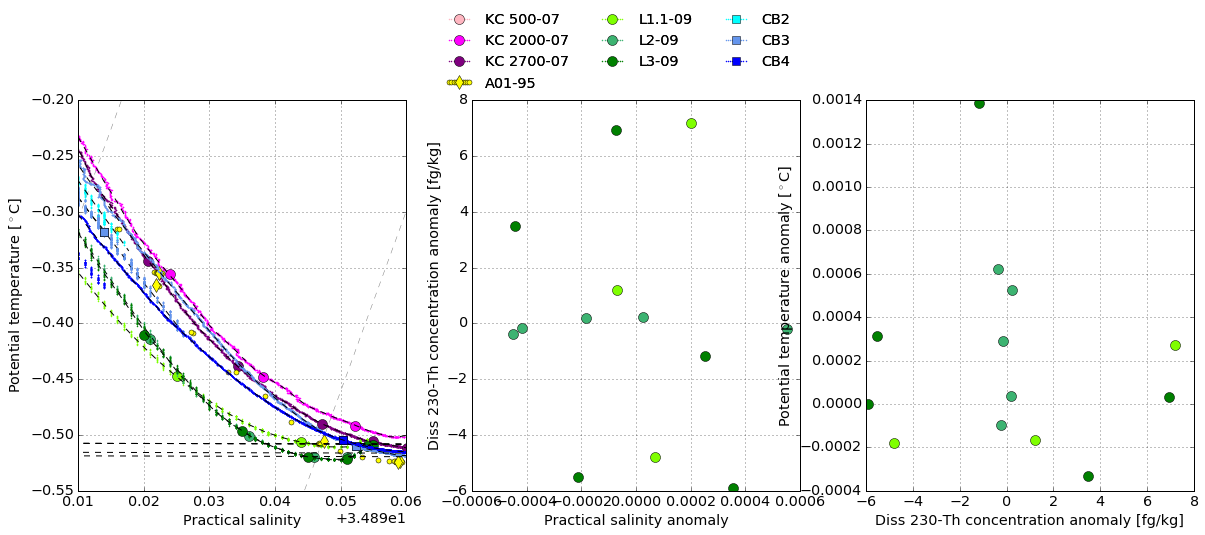

In [80]:
#%reset_selective d_range,xfilter,yfilter,idx,x,y,xfilt,yfilt

fig,((ax1, ax2,ax3))=plt.subplots(1,3,facecolor='w',figsize=(20,7))

CS=ax1.contour(si,ti,isop,900, linestyles='dashed',linewidths = 0.5, colors='grey')
ax1.clabel(CS, fontsize=12, inline=1, fmt='%0.01f') # Label every second level

for station,cast,castd,name,Mt,St,Mtd,M,S,C in zip(('KC 500-2007', 'KC 2000-2007', 'KC 2700-2007', 'A01-95',
                                              'L1.1-2009', 'L2-2009',
                          'L3-2009','CB2','CB2','CB3','CB3','CB3','CB4','CB4','CB4'),
                          (data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-1',
                           data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-2',
                           data['Cast name'] == 'TM1',data['Cast name'] == 'RADS',
                           data['Cast name'] == 'GEOCHEM-2',data['Cast name'] == 'TM1'),
                           (data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-1',
                           data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-2',
                           data['Cast name'] == 'TM1',data['Cast name'] == 'RADS',
                           data['Cast name'] == 'GEOCHEM-2',data['Cast name'] == 'TM1'),
                        ('KC 500-07', 'KC 2000-07', 'KC 2700-07', 'A01-95', 'L1.1-09', 'L2-09',
                          'L3-09','CB2','CB2','CB3','CB3','CB3','CB4','CB4','CB4'),
                        ('.','.','.','o','.','.','.','.','.','.','.','.','.','.','.'),
                        (2,2,2,5,2,2,2,2,2,2,2,2,2,2,2),
                        ('o','o','o','d','o','o','o','s','s','s','s','s','s','s','s'),
                        ('o-','o-','o-','d-','o-','o-','o-','s-','s-','s-','s-','s-','s-','s-','s-'),
                        (10,10,10,10,10,10,10,8,8,8,8,8,8,8,8),
                        ('lightpink','magenta','purple','yellow','chartreuse','mediumseagreen',
                        'green','cyan','cyan','cornflowerblue','cornflowerblue','cornflowerblue','blue','blue','blue')):
                        #('mediumvioletred','k','deeppink','yellow','lime','seagreen',
                        #'darkseagreen','gold','dodgerblue','blue')):

    ax1.plot(s[sta == station],data.Tpot[sta == station],Mt,markersize=St,color=C,label=name)
    ax1.plot(PaTh_s[PaTh_sta == station],PaThData.Tpot[PaTh_sta == station],Mtd,markersize=S,color=C,label=name)
#    ax1.set_xlim([34.4,34.9])
    ax1.set_xlim([34.90,34.95])
#    ax1.set_ylim([-0.5,0.9])
    ax1.set_ylim([-0.55,-0.2])
    ax1.set_xlabel('Practical salinity')
    ax1.set_ylabel('Potential temperature [$^\circ$C]')
    
    ### Filter the Tpot and S data

    xfilter = s[(sta == station) & (cast)]
    yfilter = data.Tpot[(sta == station) & (cast)]
    #xfilter = s[(sta == station)]
    #yfilter = data.Tpot[(sta == station)]
    idx = np.isfinite(xfilter) & np.isfinite(yfilter) # avoid the NaN
    x=xfilter[idx]
    y=yfilter[idx]

    if (station != 'A01-95') & (x.size != 0):
        xfilt = savgol_filter(x, 181, 3) # window size 5, polynomial order 3
        yfilt = savgol_filter(y, 181, 3)
        ax1.plot(xfilt, yfilt,'--',markersize=1, color='k')
    
        SAnom = x-xfilt
        TpotAnom = y-yfilt
        #SAnomIndex = s[(sta == station)].index
        dAnom = d[(sta == station)]


    ### Filter the Th data
#    xfilter = PaThData.Th[(PaTh_sta == station) & (cast)]
    xfilter = PaThData.Th[(PaTh_sta == station)]
    idx = np.isfinite(xfilter)
#   x=Th[(PaThSort_sta == station) & (cast)][idx]
    x=Th[(PaThSort_sta == station)][idx]
    if (station != 'A01-95') & (x.size != 0):
        xfilt = savgol_filter(x, 5, 3) # window size 5, polynomial order 3
        ThAnom = x-xfilt
    
    if (station == 'L1.1-2009') | (station == 'L2-2009') | (station == 'L3-2009'):

        d_range=(dAnom > 1250) & (dAnom < 2500)    
        for ax,xfield,yfield,xlabels,ylabels,xranges,yranges in zip((ax2,ax3),(SAnom[ThAnom.index],ThAnom),
                                    (ThAnom,TpotAnom[ThAnom.index]),
                                    ('Practical salinity anomaly','Diss 230-Th concentration anomaly [fg/kg]'),
                                    ('Diss 230-Th concentration anomaly [fg/kg]','Potential temperature anomaly [$^\circ$C]'),
                                    ([-0.0005,0.0005],[-8, 8]),
                                    #([0,15],[-0.05, 0.09])):
                                    ([-8,8],[-0.005, 0.005])):
                                    #([0,25],[-0.4, 0.85])):
        
            ax.plot(xfield[d_range], yfield[d_range],Mtd,markersize=S,color=C,label=name)
           # ax.set_xlim(xranges)
           # ax.set_ylim(yranges)
            ax.set_xlabel(xlabels)
            ax.set_ylabel(ylabels)

   



h1, l1 = ax1.get_legend_handles_labels()

CTD=ax2.legend((h1[0],h1[2],h1[4],h1[6],h1[8],h1[10],h1[12],h1[14],h1[18],h1[24]),
               (l1[1],l1[3],l1[5],l1[7],l1[9],l1[11],l1[13],l1[15],l1[19],l1[25]),
               numpoints=10,loc=(-0.1,1.01),ncol=3,framealpha=0,frameon=False)
    
for ax, in zip((ax1,ax2,ax3)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)


ax2.legend((h1[1],h1[3],h1[5],h1[7],h1[9],h1[11],h1[13],h1[15],h1[19],h1[25]),
            (l1[1],l1[3],l1[5],l1[7],l1[9],l1[11],l1[13],l1[15],l1[19],l1[25]),
            loc=(-0.1,1.01),ncol=3,numpoints=1,framealpha=0,frameon=True)
ax2.add_artist(CTD)
#ax2.add_artist(CTD[0,2,4,6,8,10,12,14,16,18])

#savefig('Figures/PaThStations_thetaS-ThS_zoomAW-color-v2.png',bbox_inches='tight')

plt.show()

In [61]:
station,len(dAnom),len(TpotAnom),len(SAnom),len(TpotAnom[ThAnom]),len(SAnom[ThAnom]),len(dAnom[ThAnom])
#VarS[ThAnom.index], len(xdata),i#,xdata,ydata,VarS[ThAnom.index].tolist()
#ThAnom.index
VarS,ThAnom,ind

(97561     -9.142857
 97623     36.571429
 97773    -54.857143
 97854     10.757143
 96538     42.514286
 96740    -35.014286
 97146    -16.328571
 98971     52.714286
 97553    -72.300000
 103756    87.042857
 104266   -80.571429
 104779    53.714286
 105292   -13.428571
 Name: Th, dtype: float64, 97561    -0.182857
 97623     0.731429
 97773    -1.097143
 97854     0.215143
 96538     0.850286
 96740    -0.700286
 97146    -0.326571
 98971     1.054286
 97553    -1.446000
 103756    1.740857
 104266   -1.611429
 104779    1.074286
 105292   -0.268571
 Name: Th, dtype: float64, 97561)

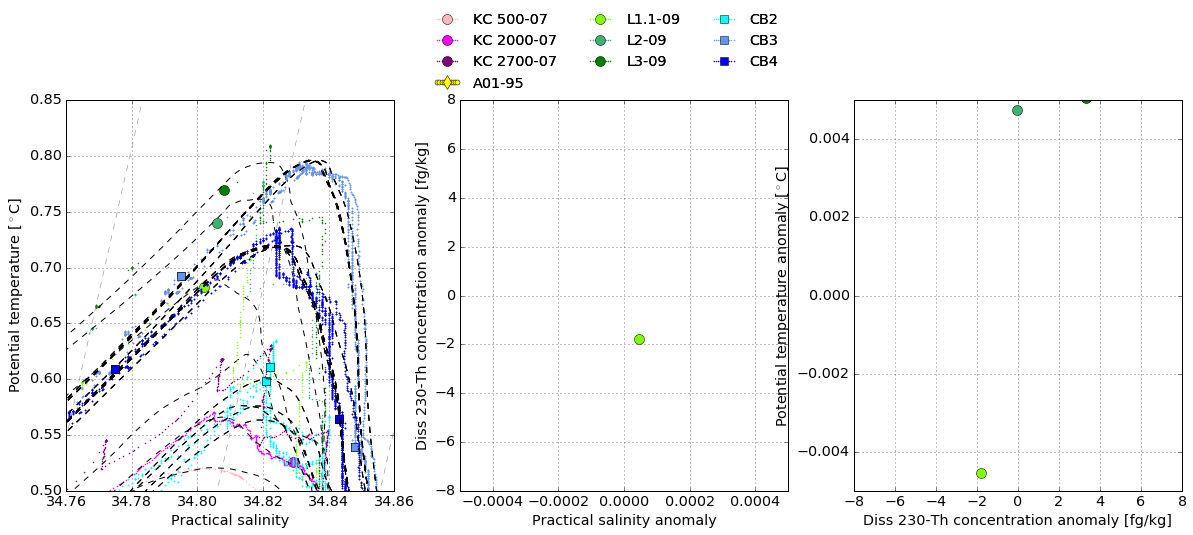

In [19]:
#%reset_selective d_range,xfilter,yfilter,idx,x,y,xfilt,yfilt

fig,((ax1, ax2,ax3))=plt.subplots(1,3,facecolor='w',figsize=(20,7))

CS=ax1.contour(si,ti,isop,900, linestyles='dashed',linewidths = 0.5, colors='grey')
ax1.clabel(CS, fontsize=12, inline=1, fmt='%0.01f') # Label every second level

for station,cast,castd,name,Mt,St,Mtd,M,S,C in zip(('KC 500-2007', 'KC 2000-2007', 'KC 2700-2007', 'A01-95',
                                              'L1.1-2009', 'L2-2009',
                          'L3-2009','CB2','CB2','CB3','CB3','CB3','CB4','CB4','CB4'),
                          (data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-1',
                           data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-2',
                           data['Cast name'] == 'TM1',data['Cast name'] == 'RADS',
                           data['Cast name'] == 'GEOCHEM-2',data['Cast name'] == 'TM1'),
                           (data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'].isnull(),data['Cast name'].isnull(),
                           data['Cast name'].isnull(),data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-1',
                           data['Cast name'] == 'RADS',data['Cast name'] == 'GEOCHEM-2',
                           data['Cast name'] == 'TM1',data['Cast name'] == 'RADS',
                           data['Cast name'] == 'GEOCHEM-2',data['Cast name'] == 'TM1'),
                        ('KC 500-07', 'KC 2000-07', 'KC 2700-07', 'A01-95', 'L1.1-09', 'L2-09',
                          'L3-09','CB2','CB2','CB3','CB3','CB3','CB4','CB4','CB4'),
                        ('.','.','.','o','.','.','.','.','.','.','.','.','.','.','.'),
                        (2,2,2,5,2,2,2,2,2,2,2,2,2,2,2),
                        ('o','o','o','d','o','o','o','s','s','s','s','s','s','s','s'),
                        ('o-','o-','o-','d-','o-','o-','o-','s-','s-','s-','s-','s-','s-','s-','s-'),
                        (10,10,10,10,10,10,10,8,8,8,8,8,8,8,8),
                        ('lightpink','magenta','purple','yellow','chartreuse','mediumseagreen',
                        'green','cyan','cyan','cornflowerblue','cornflowerblue','cornflowerblue','blue','blue','blue')):
                        #('mediumvioletred','k','deeppink','yellow','lime','seagreen',
                        #'darkseagreen','gold','dodgerblue','blue')):

    ax1.plot(s[sta == station],data.Tpot[sta == station],Mt,markersize=St,color=C,label=name)
    ax1.plot(PaTh_s[PaTh_sta == station],PaThData.Tpot[PaTh_sta == station],Mtd,markersize=S,color=C,label=name)
#    ax1.set_xlim([34.4,34.9])
    ax1.set_xlim([34.76,34.86])
#    ax1.set_ylim([-0.5,0.9])
    ax1.set_ylim([0.5,0.85])
    ax1.set_xlabel('Practical salinity')
    ax1.set_ylabel('Potential temperature [$^\circ$C]')
    
    ### Filter the Tpot and S data

    #xfilter = s[(sta == station) & (cast)]
    #yfilter = data.Tpot[(sta == station) & (cast)]
    xfilter = s[(sta == station)]
    yfilter = data.Tpot[(sta == station)]
    idx = np.isfinite(xfilter) & np.isfinite(yfilter) # avoid the NaN
    x=xfilter[idx]
    y=yfilter[idx]

    if (station != 'A01-95') & (x.size != 0):
        xfilt = savgol_filter(x, 181, 3) # window size 5, polynomial order 3
        yfilt = savgol_filter(y, 181, 3)
        ax1.plot(xfilt, yfilt,'--',markersize=1, color='k')
    
        SAnom = x-xfilt
        TpotAnom = y-yfilt
        #SAnomIndex = s[(sta == station)].index
        dAnom = d[(sta == station)]

    ### Filter the Th data
#    xfilter = PaThData.Th[(PaTh_sta == station) & (cast)]
    xfilter = PaThData.Th[(PaTh_sta == station)]
    idx = np.isfinite(xfilter)
#   x=Th[(PaThSort_sta == station) & (cast)][idx]
    x=Th[(PaThSort_sta == station)][idx]
    if (station != 'A01-95') & (x.size != 0):
        xfilt = savgol_filter(x, 5, 3) # window size 5, polynomial order 3
        ThAnom = x-xfilt
    
    if (station == 'L1.1-2009') | (station == 'L2-2009') | (station == 'L3-2009'):

        d_range=(dAnom > 350) & (dAnom < 750)    
        for ax,xfield,yfield,xlabels,ylabels,xranges,yranges in zip((ax2,ax3),(SAnom[ThAnom.index],ThAnom),
                                    (ThAnom,TpotAnom[ThAnom.index]),
                                    ('Practical salinity anomaly','Diss 230-Th concentration anomaly [fg/kg]'),
                                    ('Diss 230-Th concentration anomaly [fg/kg]','Potential temperature anomaly [$^\circ$C]'),
                                    ([-0.0005,0.0005],[-8, 8]),
                                    #([0,15],[-0.05, 0.09])):
                                    ([-8,8],[-0.005, 0.005])):
                                    #([0,25],[-0.4, 0.85])):
        
            ax.plot(xfield[d_range], yfield[d_range],Mtd,markersize=S,color=C,label=name)
            ax.set_xlim(xranges)
            ax.set_ylim(yranges)
            ax.set_xlabel(xlabels)
            ax.set_ylabel(ylabels)

    



h1, l1 = ax1.get_legend_handles_labels()

CTD=ax2.legend((h1[0],h1[2],h1[4],h1[6],h1[8],h1[10],h1[12],h1[14],h1[18],h1[24]),
               (l1[1],l1[3],l1[5],l1[7],l1[9],l1[11],l1[13],l1[15],l1[19],l1[25]),
               numpoints=10,loc=(-0.1,1.01),ncol=3,framealpha=0,frameon=False)
    
for ax, in zip((ax1,ax2,ax3)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)


ax2.legend((h1[1],h1[3],h1[5],h1[7],h1[9],h1[11],h1[13],h1[15],h1[19],h1[25]),
            (l1[1],l1[3],l1[5],l1[7],l1[9],l1[11],l1[13],l1[15],l1[19],l1[25]),
            loc=(-0.1,1.01),ncol=3,numpoints=1,framealpha=0,frameon=True)
ax2.add_artist(CTD)
#ax2.add_artist(CTD[0,2,4,6,8,10,12,14,16,18])

#savefig('Figures/PaThStations_thetaS-ThS_zoomAW-color-v2.png',bbox_inches='tight')

plt.show()

In [20]:
xfilt,yfilt
len(xfilt),len(x)
xfilt[0:10],x[0:10],station,PaThData.Th[PaTh_sta == 'CB4'],PaThData.d[PaTh_sta == 'CB4']
#len(SAnom)
min(SAnom),max(SAnom),min(TpotAnom),max(TpotAnom),min(ThAnom),max(ThAnom)
#dAnom,SAnom,TpotAnom
#ThAnom,SAnom[ThAnom.index],station,PaThData.Th[PaTh_sta == 'CB4'].index,PaThData.d[PaTh_sta == 'CB4']
#ThAnom,SAnomIndex,station,PaThData.Th[PaTh_sta == 'CB4'].index,PaThData.d[PaTh_sta == 'CB4']
#Th[PaThSort_sta == 'CB4'].index, s[(sta == 'CB4') & (data.Th.notnull())].index,ThAnom.index,SAnom[ThAnom.index].index
#PaThData.Th[PaTh_sta == 'CB2'].index, s[(sta == 'CB2') & (data.Th.notnull())].index,ThAnom.index,SAnom[ThAnom.index].index

(-5.4986022807590018,
 4.2318788672626795,
 -0.57486467127264484,
 0.65993953739679945,
 -1.6114285714285757,
 1.7408571428571413)

In [21]:
len(handles)

30